### Basic Imports

In [1]:
import numpy as np
from diffractio import mm, um, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


# Setting up
length = 1 * mm
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.633 * um

number of processors: 12


### Setting up source
- Gaussian Beam (LASER)

((<matplotlib.image.AxesImage at 0x272b852da60>,
  <matplotlib.image.AxesImage at 0x272b87cc220>),
 None,
 None)

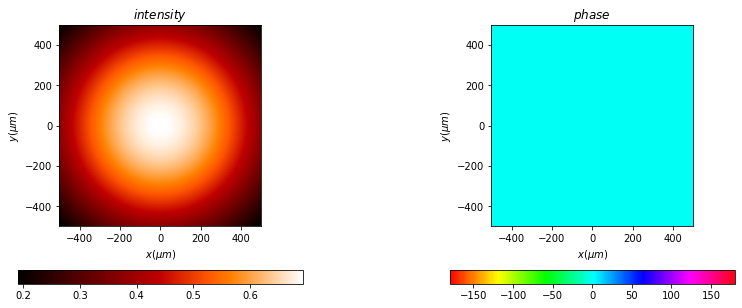

In [2]:
# Gaussian Beam Source - like a LASER
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0, 0), w0=(800 * um, 800 * um), z0=0.0)
u0.draw(kind='field', logarithm=True)

## Slits

- Fraunhofer Diffraction Patterns for different slit widths

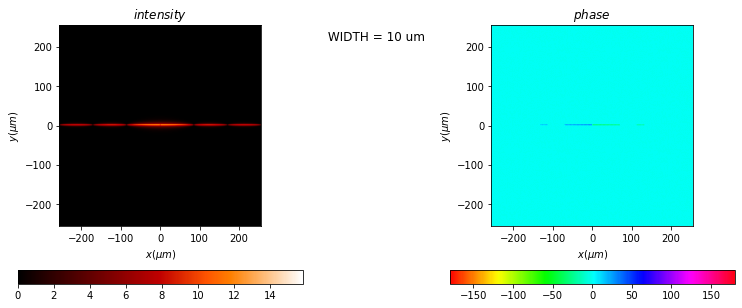

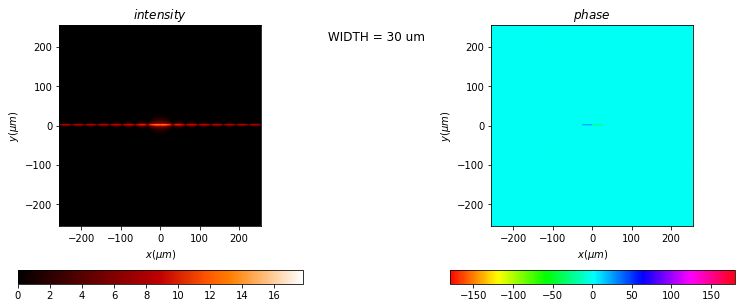

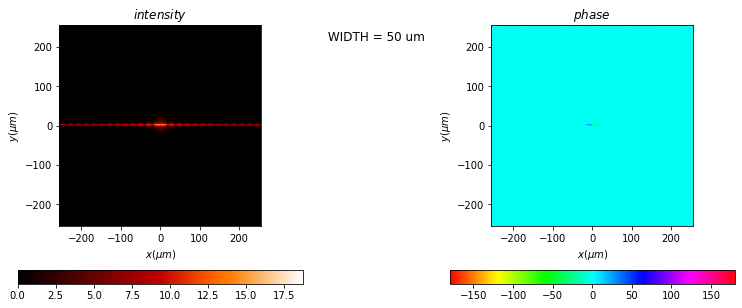

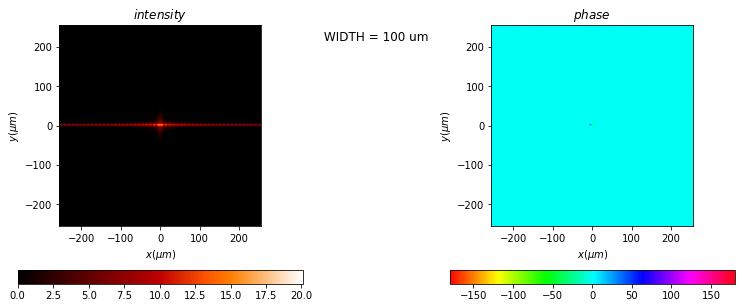

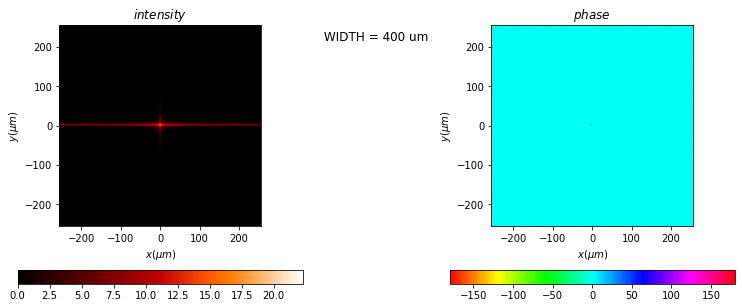

In [3]:
widths = [10, 30, 50, 100, 400]  # in um
for width in widths:
    varSlit = Scalar_mask_XY(x0, y0, wavelength)
    varSlit.slit(
        x0=0 * um,
        size=width * um
    )
#     varSlit.draw(kind='field', logarithm=True)
    a_varSlit = (u0 * varSlit).fft(z=1 * mm, new_field=True)
    a_varSlit.draw(title=f" WIDTH = {width} um ", kind='field', logarithm=True)

#### The intensity variation matches the expected profile.

## Pinhole

- Fraunhofer Diffraction Patterns for different pinhole radii

((<matplotlib.image.AxesImage at 0x272bd337eb0>,
  <matplotlib.image.AxesImage at 0x272bd3aa6a0>),
 None,
 None)

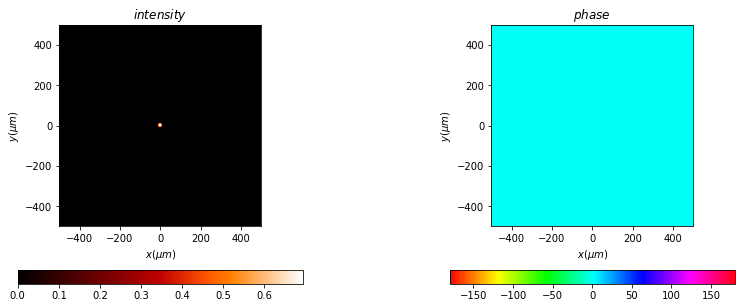

In [4]:
# Showcasing a pinhole
circ = Scalar_mask_XY(x0, y0, wavelength)
circ.circle(
    r0=(0 * um, 0 * um),
    radius=(10 * um, 10 * um),
    angle=0
)
circ.draw(kind='field', logarithm=True)

### Diffraction pattern for multiple pinholes having different radius

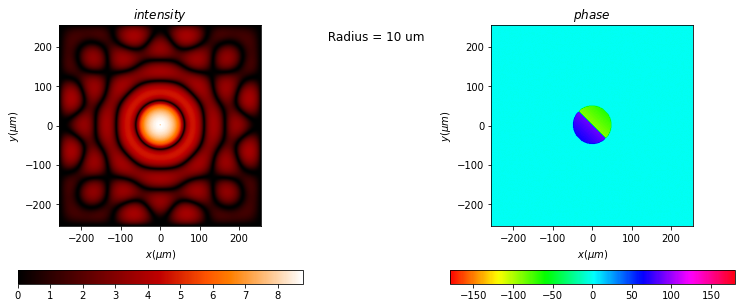

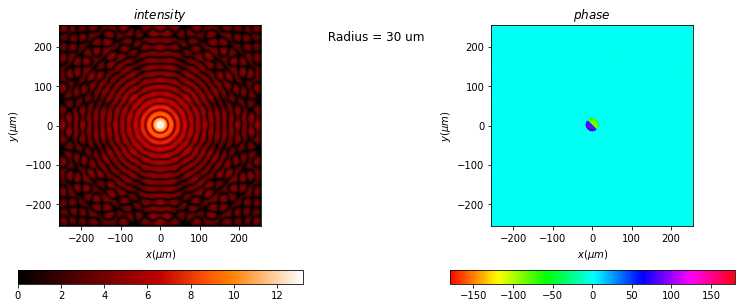

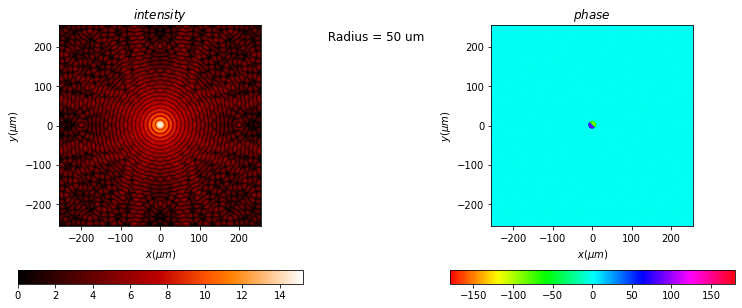

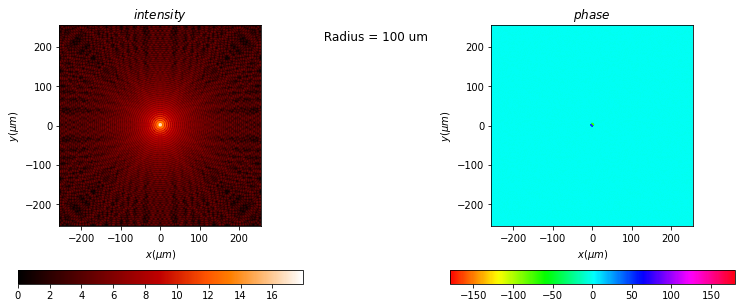

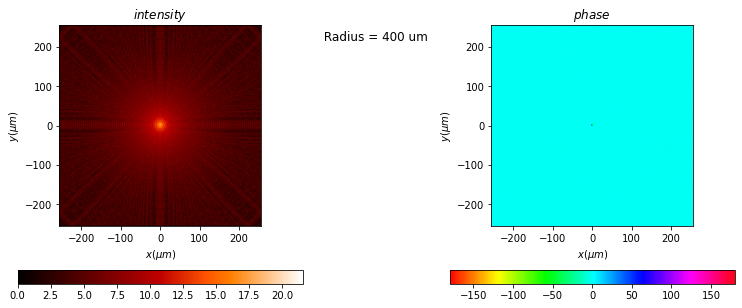

In [5]:
radii = [10, 30, 50, 100, 400]  # in um
for rad in radii:
    circ = Scalar_mask_XY(x0, y0, wavelength)
    circ.circle(
        r0=(0 * um, 0 * um),
        radius=(rad * um, rad * um),
        angle=0
    )

    a_circ = (u0 * circ).fft(z=1 * mm, new_field=True)
    a_circ.draw(title=f" Radius = {rad} um ", kind='field', logarithm=True)

#### We observe the well-known Airy Disk in all cases, as theoretically expected.

## Grating

- Fraunhofer Diffraction Patterns for grating

((<matplotlib.image.AxesImage at 0x272bf6b80a0>,
  <matplotlib.image.AxesImage at 0x272bcbed820>),
 None,
 None)

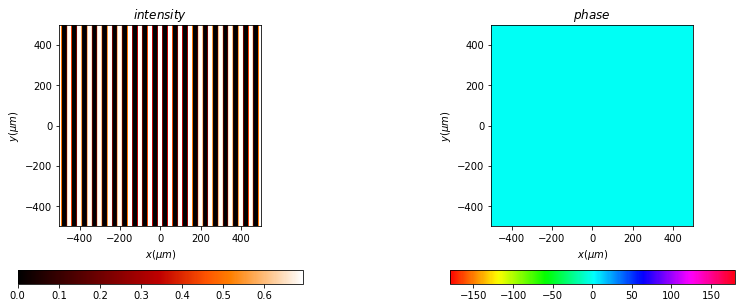

In [6]:
grating = Scalar_mask_XY(x0, y0, wavelength)
grating.ronchi_grating(
    period=50 * um,
)

grating.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x272b95608e0>,
  <matplotlib.image.AxesImage at 0x272b954b0a0>),
 None,
 None)

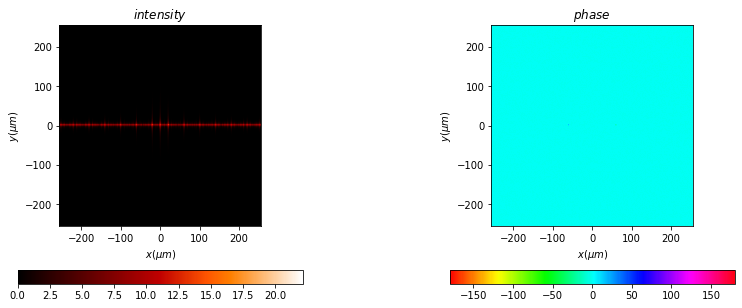

In [7]:
# Fourier Plane - No Filter
a_L1 = (u0 * grating).fft(z=1 * mm, new_field=True)
a_L1.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x272b95ee6a0>,
  <matplotlib.image.AxesImage at 0x272b928b970>),
 None,
 None)

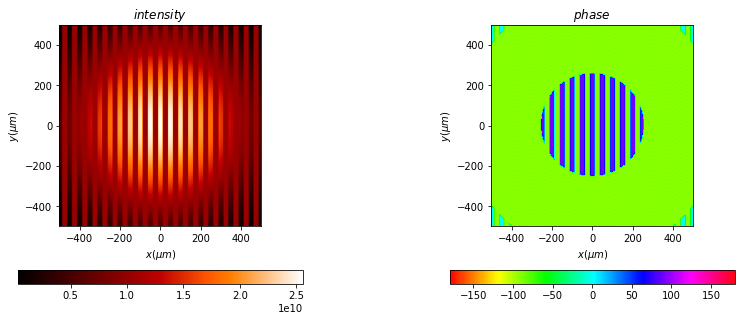

In [8]:
a_L2 = a_L1.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
a_L2.draw(kind='field', logarithm=False)